<a href="https://colab.research.google.com/github/mgje/PIUMP/blob/master/coLab-Notebooks/Geld_der_Schweizer_Nationalbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geld der Schweizer Nationalbank SNB

![](https://static.wikia.nocookie.net/disney/images/5/57/Images%C3%B6%C3%B6%C3%B6%C3%B6.jpg/revision/latest/scale-to-width-down/340?cb=20140828163249&path-prefix=de)

![](https://cdn.meine-vrm.de/5_0J8DhJ-0F2MavdfXje4VFoEzU=/1200x628/smart/819%2F18735%2F18735875%2F36581502.jpg)

## Grosse Zahlen


| 1 kFr. | 1 MFr. | 1ooo MFr. | 1BFr. |
| :- | -: | :-: |:-: |
| 1 Tausend | 1 Million | 1 Milliarde | 1 Billion
| ![](https://media-cdn.sueddeutsche.de/image/sz.1.4356005/600x337?v=1551804765000) | ![](https://cdn.handelszeitung.ch/sites/default/files/styles/16x9_890/public/bz/lead_image/1000-franken.jpg) | ![](https://lh3.googleusercontent.com/proxy/Dl70JqyeHY9R87V0ypJAYx-eETZvvByZS7I8eU14xiM1yIppr0PmTAVWFZQf6-LS3Iiu6_5DQU8vteebtVZAj5YV58mPrxjCe0TdM02Y5pqo_0E2YpZigkKbGvOHvVtyDg) | ![](https://www.watson.ch/imgdb/4ee2/Qx,E,394,712,2381,1579,1241,914,708,531/4835485492916437)

# Daten von der SNB laden und in Tabellen abspeichern

- Drücken Sie auf den Pfeil [&#9654;&#65039;] in der Zelle unterhalb um alle Daten von der SNB zu laden

oder wählen Sie:

- Alle Zellen in Notebook ausführen⌘/Ctrl+F9

ein paar Unicode Codes

- &#128317; &#9654; 
- &#9989; &#10062;
- &#8680; &#9654;&#65039;

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 8),
            'legend.fontsize': 16,
            'ytick.labelsize': 18.0,
            'xtick.labelsize': 18.0,
            'axes.labelsize': 18.0,
            'axes.titlesize': 18.0,
            'font.size': 18.0})
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
import matplotlib as mpl



In [206]:
#Alle Visualisierungsparameter für Grafiken anzeigen
#mpl.rcParams.keys()

In [207]:
#Load SNB Data
url='https://data.snb.ch/json/table/getFile?fileId=94dc2c2cdc61289a48ebc192ba625ce492aff7f16cae87a75c8139f247433cd8&pageViewTime=20210209_105925&lang=de'
dfnb = pd.read_csv(url,sep=";",skiprows=2)
dfnb.head()


,Date,D0,Value
0,1996-12,GFG,11903.9
1,1996-12,D,49328.4
2,1996-12,RIWF,2067.8
3,1996-12,IZ,290.0
4,1996-12,W,204.3


In [208]:
# Legenden und Positionen der Bilanz
## NB Akürzungen

abk = ['GFG', 'D', 'RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD',
       'GSGSF', 'IG', 'GD', 'FI', 'WSF', 'DS', 'UA', 'T0', 'N', 'GB',
       'VB', 'GBI', 'US', 'VRGSF', 'ES', 'UT', 'VF', 'AIWFS', 'SP', 'RE',
       'T1']

abkT = ['Gold und Forderungen aus Goldgeschäften',
	'Devisenanlagen',
	'Reserveposition beim IWF',
	'Internationale Zahlungsmittel',
	'Währungshilfekredite',
	'Forderungen aus Repo-Geschäften in Schweizer Franken',
	'Forderungen aus Repo-Geschäften in US-Dollar',
	'Guthaben aus Swap-Geschäften gegen Schweizer Franken',
	'Inländische Geldmarktforderungen',
	'Gedeckte Darlehen',
	'Forderungen gegenüber Inlandkorrespondenten',
	'Wertschriften in Schweizer Franken',
  'Darlehen an Stabilisierungsfonds',
	'Übrige Aktiven',
	'Total A',
	'Notenumlauf',
	'Girokonten inländischer Banken',
	'Verbindlichkeiten gegenüber dem Bund',
	'Girokonten ausländischer Banken und Institutionen',
	'Übrige Sichtverbindlichkeiten',
	'Verbindlichkeiten aus Repo-Geschäften in Schweizer Franken',
	'Eigene Schuldverschreibungen',
	'Übrige Terminverbindlichkeiten',
	'Verbindlichkeiten in Fremdwährungen',
	'Ausgleichsposten für vom IWF zugeteilte Sonderziehungsrechte',
	'Sonstige Passiven',
	'Rückstellungen und Eigenkapital',
	'Total P']

nbleg = {}
for i in range(len(abk)):
  nbleg[abk[i]]=abkT[i]

nbleg['D']


'Devisenanlagen'

In [209]:
## Daten der SNB in Tabellen abfüllen

dfL = []
for z in abk:
  dfL.append(dfnb[dfnb['D0']==z])

data = [df['Value']  for df in dfL]
dtindex = pd.to_datetime(dfL[0]['Date'].array)
dfnbL = pd.DataFrame(data[0].array ,columns=[abk[0]],index=dtindex)

for i in range(1,len(abk)):
  dfnbL[abk[i]] = data[i].array

In [210]:
#Ausschnitt aus SNB Bilanz vom letzten Jahr

dfnbL.tail(12).rename(columns=nbleg)


,Gold und Forderungen aus Goldgeschäften,Devisenanlagen,Reserveposition beim IWF,Internationale Zahlungsmittel,Währungshilfekredite,Forderungen aus Repo-Geschäften in Schweizer Franken,Forderungen aus Repo-Geschäften in US-Dollar,Guthaben aus Swap-Geschäften gegen Schweizer Franken,Inländische Geldmarktforderungen,Gedeckte Darlehen,Forderungen gegenüber Inlandkorrespondenten,Wertschriften in Schweizer Franken,Darlehen an Stabilisierungsfonds,Übrige Aktiven,Total A,Notenumlauf,Girokonten inländischer Banken,Verbindlichkeiten gegenüber dem Bund,Girokonten ausländischer Banken und Institutionen,Übrige Sichtverbindlichkeiten,Verbindlichkeiten aus Repo-Geschäften in Schweizer Franken,Eigene Schuldverschreibungen,Übrige Terminverbindlichkeiten,Verbindlichkeiten in Fremdwährungen,Ausgleichsposten für vom IWF zugeteilte Sonderziehungsrechte,Sonstige Passiven,Rückstellungen und Eigenkapital,Total P
2020-01-01,51119.631901,783042.639181,1357.281079,4348.529430,347.619243,0.0000,0.000000,0.0,NaN,0.000000,0.0,4028.389350,0.0,930.042961,845174.133145,82805.212995,501671.384129,21306.508173,37653.624026,29832.586566,0.0,0.0,0.0000,4647.940103,4385.518243,126.572922,162744.785988,845174.133145
2020-02-01,52291.986412,788307.458784,1314.623212,4327.827212,345.116258,0.0000,0.000000,0.0,NaN,0.000000,0.0,4071.088845,0.0,914.487276,851572.587999,82493.640325,500012.625741,21317.848166,48266.393386,29280.840841,0.0,0.0,0.0000,4849.955508,4362.534863,231.502504,160757.246665,851572.587999
2020-03-01,51920.260844,781440.799499,1291.869130,4164.863706,476.489833,642.0000,5876.422310,0.0,NaN,1111.005826,0.0,3978.725120,0.0,1408.432297,852310.868566,83224.393000,526069.764277,24142.983622,41160.702321,34283.540602,0.0,0.0,5898.6470,4046.630799,4332.252041,294.515809,128857.439095,852310.868566
2020-04-01,55331.257111,811870.964003,1664.816050,4191.570537,761.655412,6078.0000,10311.941750,0.0,NaN,8217.010732,0.0,3943.899451,0.0,1117.837425,903488.952470,83781.783695,584409.398660,31408.813832,23643.177761,29086.758635,0.0,0.0,10291.0425,29.542924,4360.003075,47.790088,136430.641299,903488.952470
2020-05-01,55658.784459,827403.801614,1682.010579,4491.827046,940.859898,4013.0000,9920.511750,0.0,NaN,9535.392121,0.0,3933.401058,0.0,1067.708049,918647.296574,84371.788890,591288.039576,36224.530747,24389.122320,29897.999936,0.0,0.0,9981.4816,228.263264,4338.236268,28.699819,137899.134154,918647.296574
2020-06-01,56231.985804,863218.852789,1654.317599,4451.667169,932.850441,4654.0000,9608.501780,0.0,NaN,10102.043564,0.0,4003.655805,0.0,1439.636880,956297.511831,84901.429115,596650.041468,35720.343455,26063.072792,32936.790330,0.0,0.0,9717.6638,1891.474270,4299.437430,268.326145,163848.933026,956297.511831
2020-07-01,59949.047378,859129.787246,1623.741788,4369.811674,912.626506,4300.0000,2911.490700,0.0,NaN,10899.564380,0.0,4005.543310,0.0,1176.072296,949277.685277,84748.936435,625402.276161,23318.078098,17010.084005,29449.835499,0.0,0.0,3039.1169,2133.789928,4220.393016,42.616300,159912.558936,949277.685277
2020-08-01,59468.902697,859650.168132,1589.206472,4370.771814,911.894505,7650.0000,1937.730700,0.0,NaN,11084.084398,0.0,3984.388231,0.0,1163.803201,951810.950150,84847.823855,630860.407267,24170.493134,18724.072261,29279.611178,0.0,0.0,2027.8385,880.643544,4221.050623,35.413289,156763.596499,951810.950150
2020-09-01,58229.245179,884157.445402,1872.817599,4418.526508,922.527762,8217.6156,689.531364,0.0,NaN,11175.944828,0.0,4009.014526,0.0,1321.393791,975014.062560,85263.298980,636612.124702,22022.764080,18598.312429,28655.893680,0.0,0.0,694.2550,412.505685,4267.148904,326.585257,178161.173842,975014.062560
2020-10-01,57556.263258,882109.631456,1866.718421,4404.614176,918.649108,7250.0000,1917.371100,0.0,NaN,11253.568187,0.0,4017.909164,0.0,994.840487,972289.565358,85615.809325,634953.947990,18491.470375,27231.251201,27579.460202,0.0,0.0,1909.6336,397.730208,4253.733713,69.110216,171787.418528,972289.565358


# Wie sah die Bilanz der SNB vor 20 Jahren aus?

- Massgebend sind die Devisenanlagen in der Grössenordnung von 50 Mrd. Fr.

- In der Liste 'aktive' können Sie wählen, welche Positionen im Diagramm dargestellt werden.

- Die Bedeutung der Abkürzungen finde Sie weiter oben oder bei der SNB

Text(0.5, 1.0, 'Bilanz SNB, Aktiven')

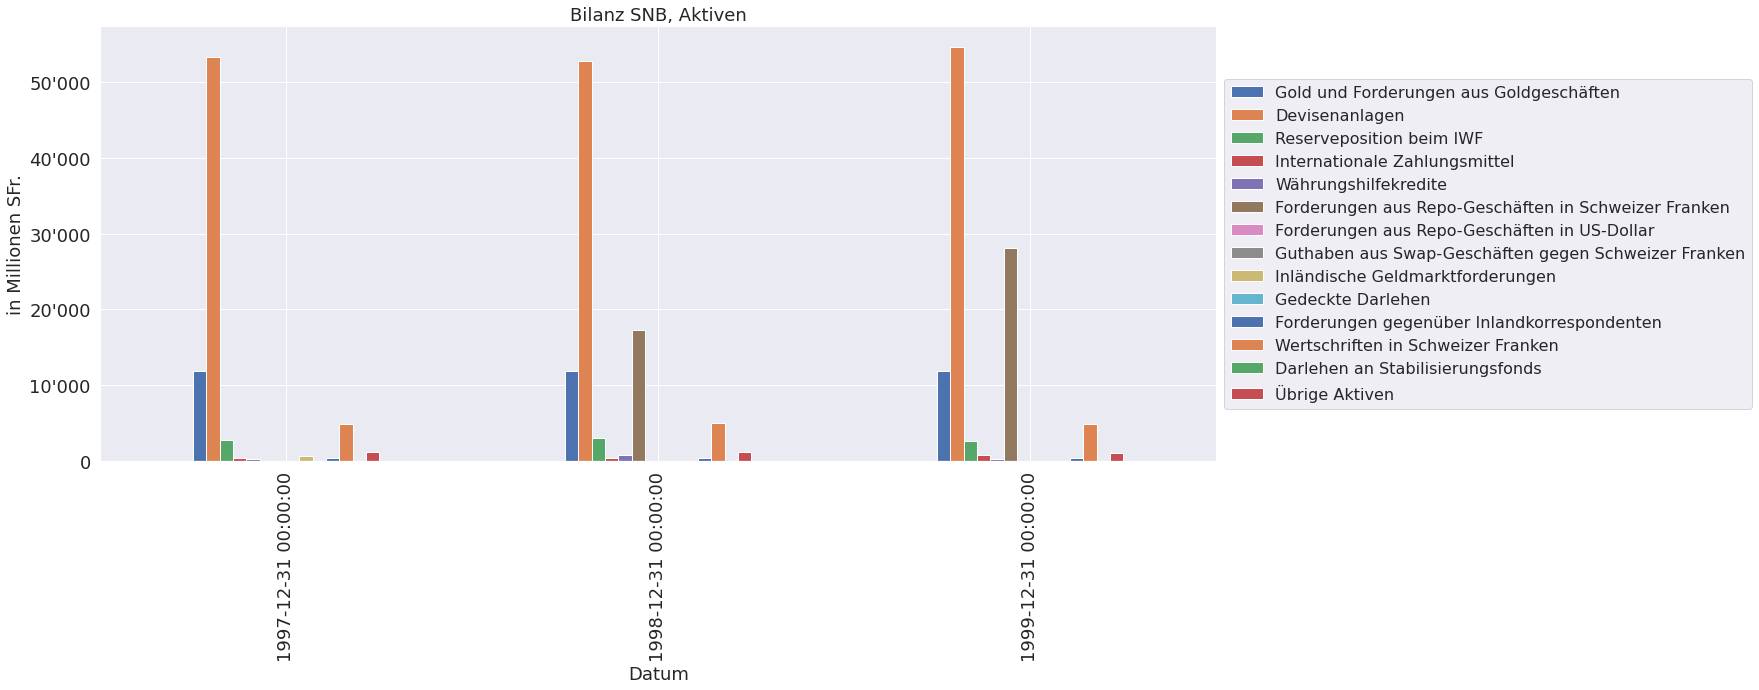

In [190]:
aktive = ['GFG', 'D', 'RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD',
       'GSGSF', 'IG', 'GD', 'FI', 'WSF', 'DS', 'UA']

label = [nbleg[a] for a in aktive]

dfnbL_re = dfnbL.resample('12M').pad()
ax=dfnbL_re['1997-01-01':'1999-12-31'].plot(y=aktive,kind='bar',label=label)

ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Datum')
ax.set_ylabel('in Millionen SFr.')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Rewrite the y labels
y_labels = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y).replace(",", "'") for y in y_labels])
ax.set_title('Bilanz SNB, Aktiven')

## Aktive der SNB Bilanz im 97,98,99 ohne Devicen
- Grössenordnung 25 Mrd. SFr.

Text(0.5, 1.0, 'Bilanz  SNB ohne Devicen, Aktiven')

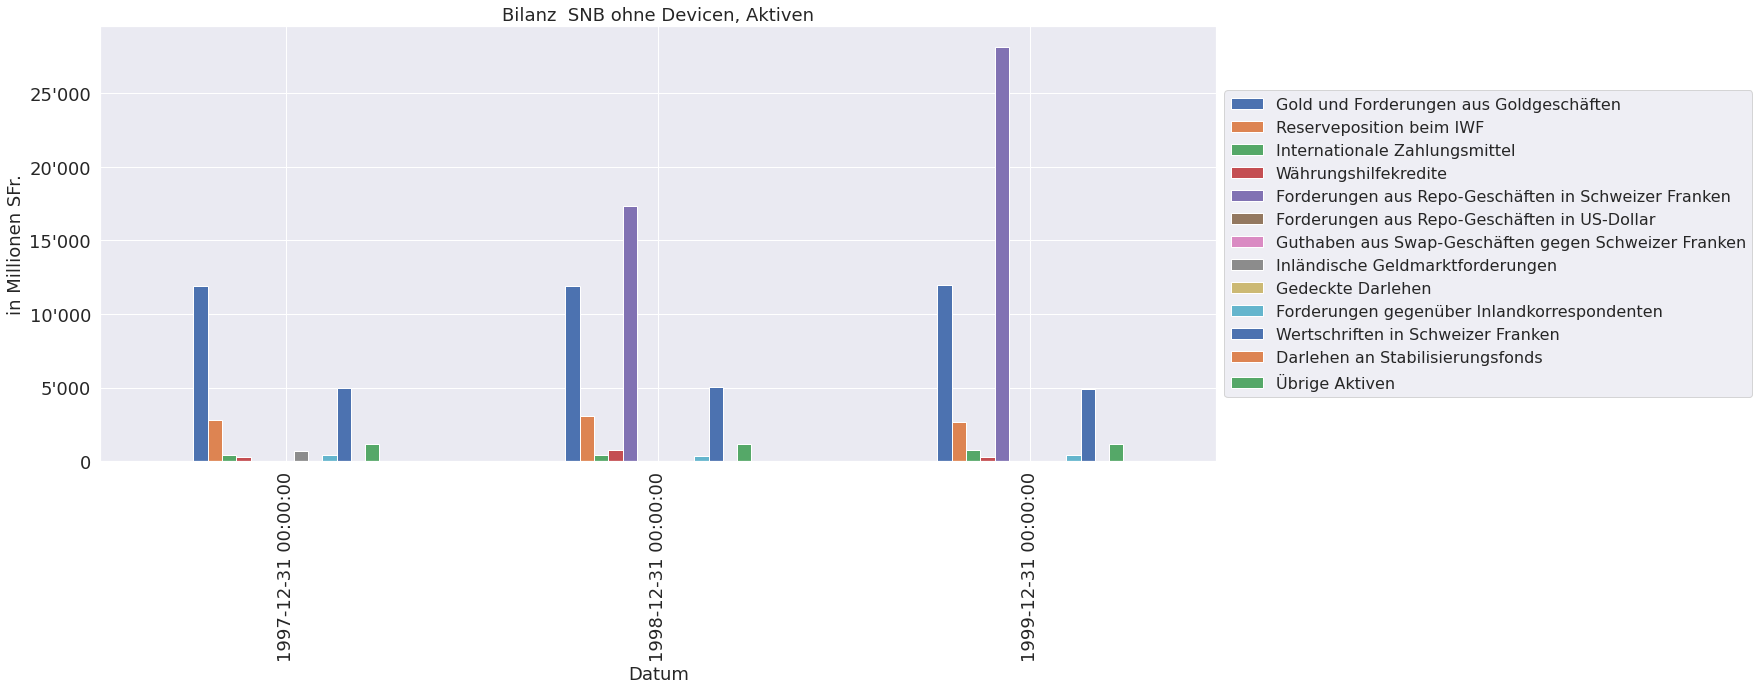

In [192]:
aktive = ['GFG', 'RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD',
       'GSGSF', 'IG', 'GD', 'FI', 'WSF', 'DS', 'UA']

label = [nbleg[a] for a in aktive]

dfnbL_re = dfnbL.resample('12M').pad()
ax=dfnbL_re['1997-01-01':'1999-12-31'].plot(y=aktive,kind='bar',label=label)

ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Datum')
ax.set_ylabel('in Millionen SFr.')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Rewrite the y labels
y_labels = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y).replace(",", "'") for y in y_labels])
ax.set_title('Bilanz  SNB ohne Devicen, Aktiven')

# Wie verändert sich die Bilanz im Verlauf der Zeit?

- Wie sieht es heute aus?

- Die Bilanzsumme wächst linear, aber ungebremst

- Der Hauptanteil liegt bei den Devicen

## Diagramm Bilanz 2019, 2020

- Die Devicenanlagen sind massgebend
- Bilanzsumme beträgt 900 Mrd SFr.

Text(0.5, 1.0, 'Bilanz SNB, 2019 und 2020 Aktiven')

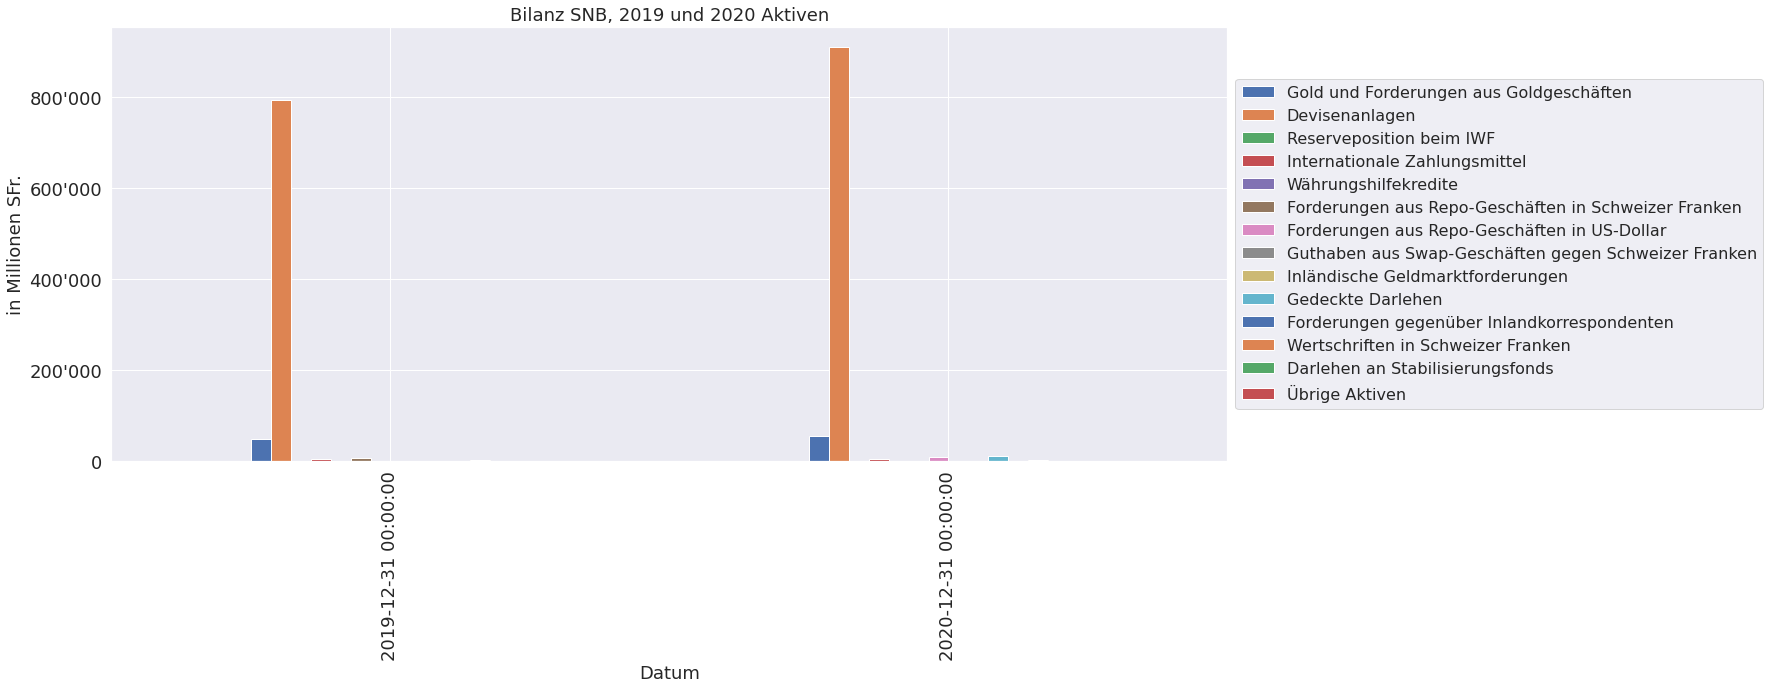

In [193]:
aktive = ['GFG', 'D', 'RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD',
       'GSGSF', 'IG', 'GD', 'FI', 'WSF', 'DS', 'UA']

label = [nbleg[a] for a in aktive]

dfnbL_re = dfnbL.resample('12M').pad()
ax=dfnbL_re['2019-01-01':'2021-12-31'].plot(y=aktive,kind='bar',label=label)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Datum')
ax.set_ylabel('in Millionen SFr.')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Rewrite the y labels
y_labels = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y).replace(",", "'") for y in y_labels])
ax.set_title('Bilanz SNB, 2019 und 2020 Aktiven')

## Bilanz ohne Devicenanlagen

- ist vergleichbar mit den Jahren 97, 98, 99
- man sieht auch, dass sich die Goldreserven verdoppelt haben

Text(0.5, 1.0, 'Bilanz  SNB ohne Devicen 2019 2020, Aktiven')

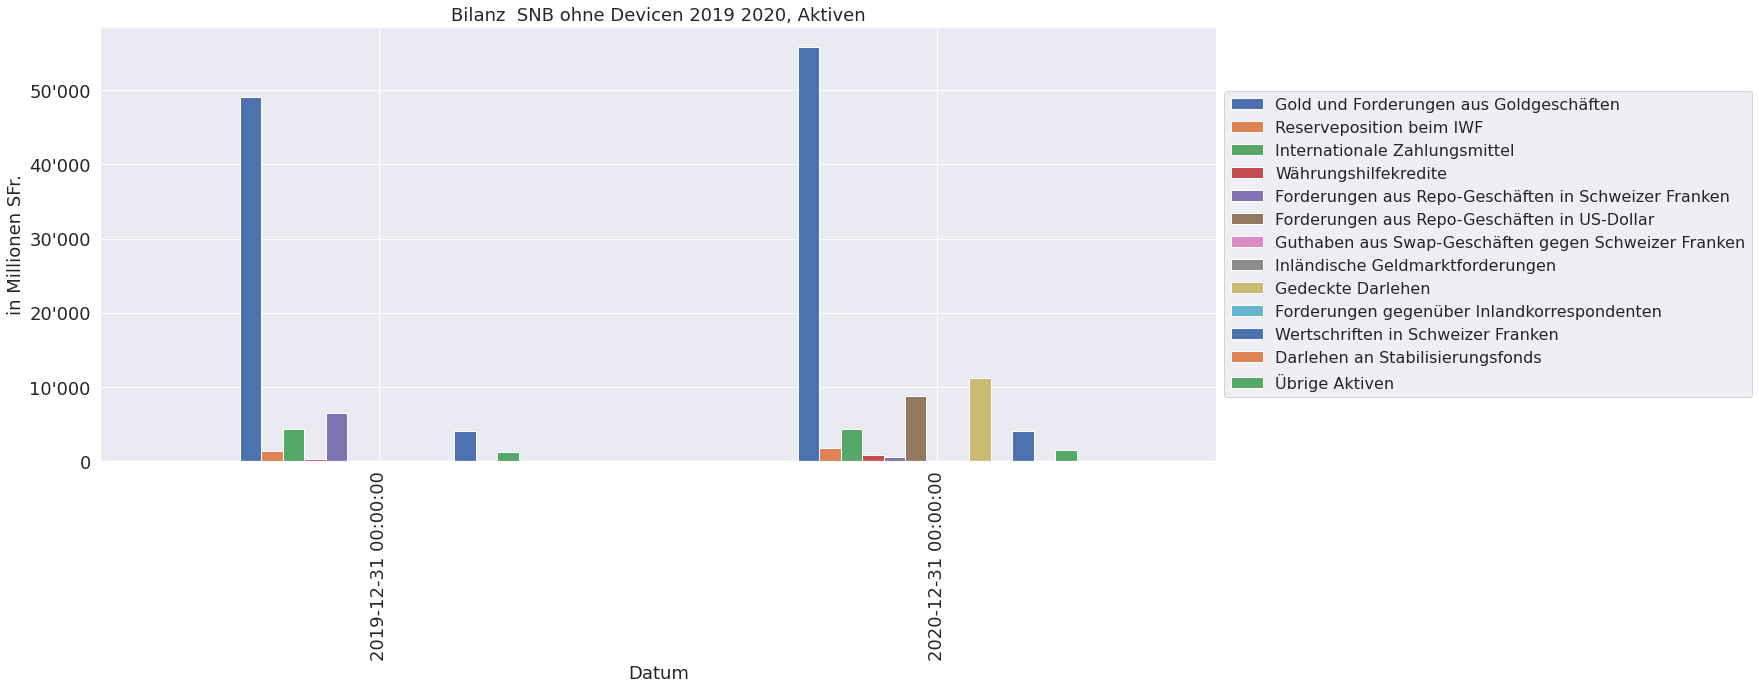

In [211]:
aktive = ['GFG', 'RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD',
       'GSGSF', 'IG', 'GD', 'FI', 'WSF', 'DS', 'UA']

label = [nbleg[a] for a in aktive]



dfnbL_re = dfnbL.resample('12M').pad()
ax=dfnbL_re['2019-01-01':'2021-12-31'].plot(y=aktive,kind='bar',label=label)

ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Datum')
ax.set_ylabel('in Millionen SFr.')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Rewrite the y labels
y_labels = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y).replace(",", "'") for y in y_labels])
ax.set_title('Bilanz  SNB ohne Devicen 2019 2020, Aktiven')

## In dem gestapelten Diagramm erkennt man die Relevanz der Devisenanlagen bei der SNB von 1997 bis heute

- Bilanz der SNB hat eine Summe von 1 Billion erreicht!

Text(0.5, 1.0, 'Gestapeltes Zeitdiagramm (stacked Plot) ABilanz SNB, Aktiven')

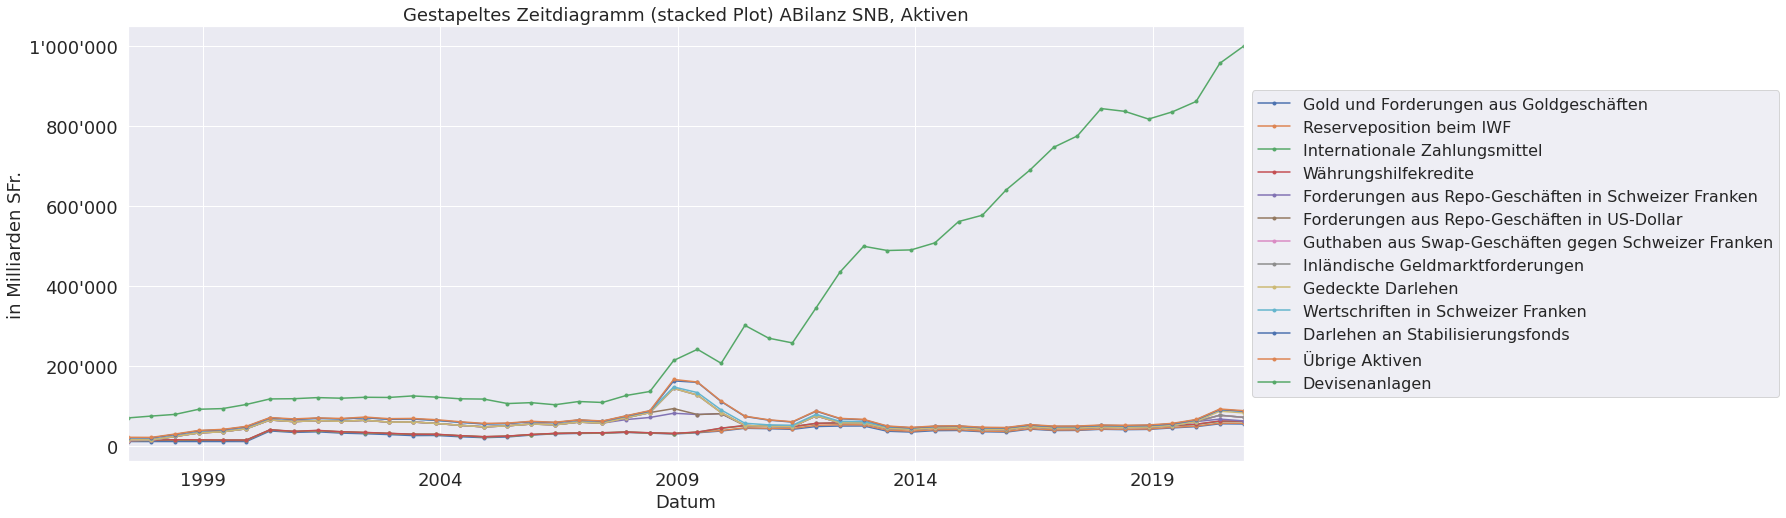

In [197]:
#from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
import matplotlib as mpl
abk=['GFG','RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD','GSGSF', 'IG', 'GD', 
     'WSF', 'DS', 'UA','D']

label = [nbleg[a] for a in abk]

dfnbL_re = dfnbL.resample('6M').pad()
ax=dfnbL_re['1997-01-01':'2021-08-31'].plot(y=abk,
                                         stacked=True,label=label,marker='o',
                                         ms=3,linewidth=1.5)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Datum')
ax.set_ylabel('in Milliarden SFr.')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Rewrite the y labels
y_labels = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y).replace(",", "'") for y in y_labels])
ax.set_title('Gestapeltes Zeitdiagramm (stacked Plot) ABilanz SNB, Aktiven')

In [170]:
#dfnbL_re.tail(4),dfnbL.tail(2)

# Die Nationalbank erzeugt von Jahr zu Jahr positive Bilanzunterschiede

- Betrachtet man den Unterschied von Jahr zu Jahr stellt man fest die Bilanzsumme wächst kontinuierlich


In [178]:
df = dfnbL.resample('12M').pad()
df.index = df.index-np.timedelta64(1, 'M')+np.timedelta64(1,'D')
dfnbLdiff = df.diff()
dfnbLdiff.tail(5).rename(columns=nbleg)

,Gold und Forderungen aus Goldgeschäften,Devisenanlagen,Reserveposition beim IWF,Internationale Zahlungsmittel,Währungshilfekredite,Forderungen aus Repo-Geschäften in Schweizer Franken,Forderungen aus Repo-Geschäften in US-Dollar,Guthaben aus Swap-Geschäften gegen Schweizer Franken,Inländische Geldmarktforderungen,Gedeckte Darlehen,Forderungen gegenüber Inlandkorrespondenten,Wertschriften in Schweizer Franken,Darlehen an Stabilisierungsfonds,Übrige Aktiven,Total A,Notenumlauf,Girokonten inländischer Banken,Verbindlichkeiten gegenüber dem Bund,Girokonten ausländischer Banken und Institutionen,Übrige Sichtverbindlichkeiten,Verbindlichkeiten aus Repo-Geschäften in Schweizer Franken,Eigene Schuldverschreibungen,Übrige Terminverbindlichkeiten,Verbindlichkeiten in Fremdwährungen,Ausgleichsposten für vom IWF zugeteilte Sonderziehungsrechte,Sonstige Passiven,Rückstellungen und Eigenkapital,Total P
2016-12-01 13:30:54,3933.672681,102870.069149,-267.241282,-301.150834,-14.507354,0.000,0.000000,0.0,NaN,0.000000,0.0,25.242136,0.0,104.079236,106350.163734,5202.477810,65882.678267,-3701.259447,-1036.468255,-129.938227,0.0,0.0,0.0000,16574.940360,-54.910221,137.739329,23474.904118,106350.163734
2017-12-01 13:30:54,3093.696033,94020.619705,-469.893400,89.323241,54.865876,0.000,0.000000,0.0,NaN,0.000000,0.0,-41.452572,0.0,57.249009,96804.407892,3554.522800,2240.211816,7525.156392,29500.633156,4363.200215,0.0,0.0,0.0000,-3162.750440,79.899304,63.146470,52640.388178,96804.407892
2018-12-01 13:30:54,-256.726974,-26396.881436,317.138556,-54.931084,50.016350,0.000,0.000000,0.0,NaN,0.000000,0.0,20.896511,0.0,82.936511,-26237.551566,599.940010,10194.863313,857.777842,-16983.866421,7079.828799,0.0,0.0,0.0000,-11121.794768,-86.146574,157.380437,-16935.534203,-26237.551566
2019-12-01 13:30:54,6873.535457,30287.380785,180.249339,-59.971165,15.938842,6529.000,0.000000,0.0,NaN,0.000000,0.0,97.176125,0.0,-35.870539,43887.438844,2211.273185,25176.303355,7868.874585,-6937.656931,-9481.204640,0.0,0.0,0.0000,-21497.119236,-68.621336,-234.634089,46850.223951,43887.438844
2020-12-01 13:30:54,6636.266858,115985.760833,480.923389,-16.738841,631.394982,-5979.052,8841.737778,0.0,NaN,11176.392896,0.0,-1.352837,0.0,316.270805,138071.603862,4563.517855,123014.622214,-9726.173709,-2043.855354,163.564314,0.0,0.0,9027.1433,-3741.704137,-203.891186,150.315088,16868.065478,138071.603862


Text(0.5, 1.0, 'Performance oder Bilanzunterschied der Aktiven')

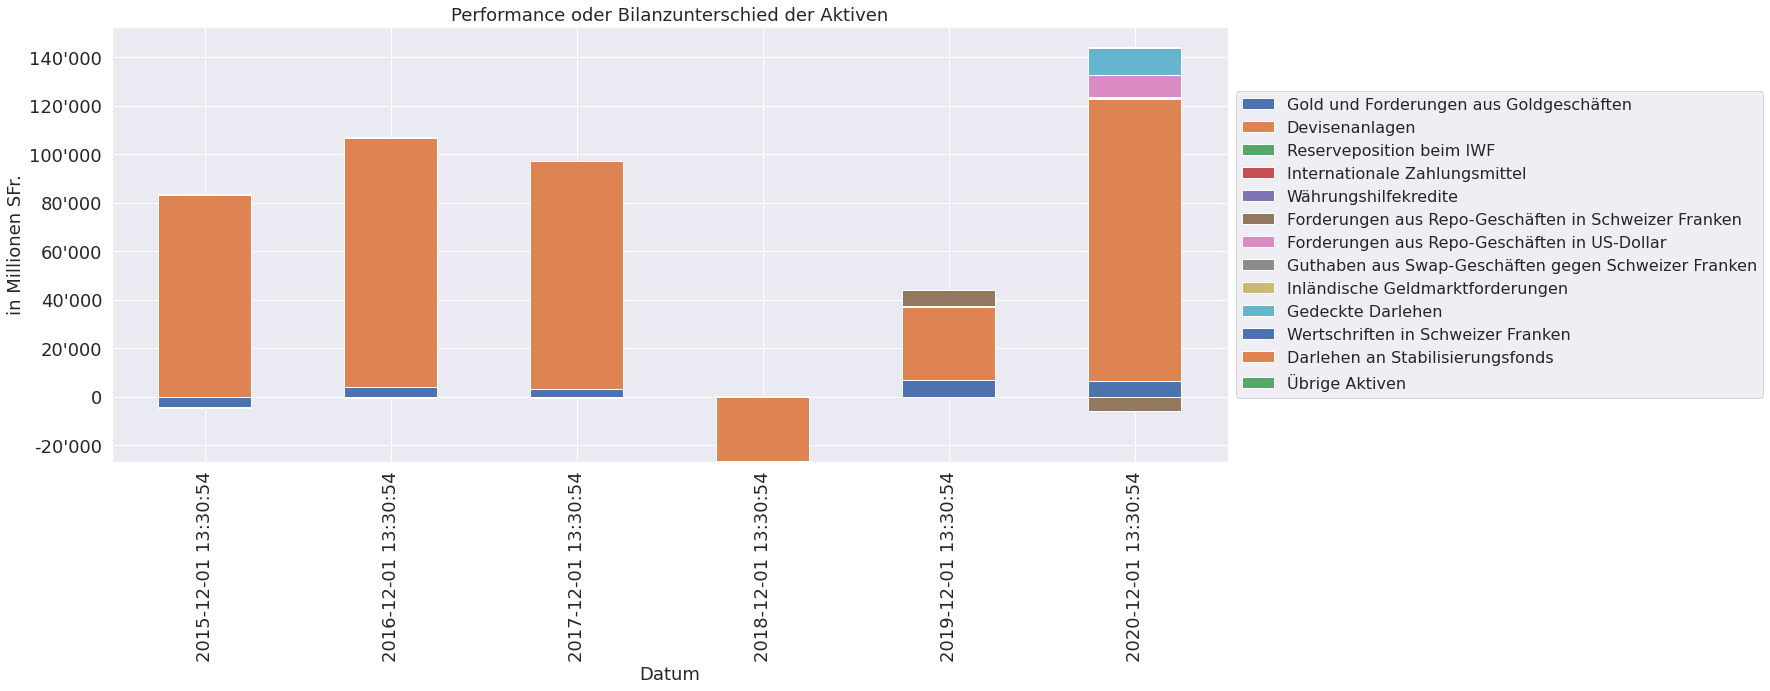

In [198]:
abk=['GFG','D','RIWF', 'IZ', 'W', 'FRGSF', 'FRGUSD','GSGSF', 'IG', 'GD', 
     'WSF', 'DS', 'UA']

label = [nbleg[a] for a in abk]

ax=dfnbLdiff.tail(6).plot(y=abk,
                          label=label,kind='bar',stacked=True)

ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Datum')
ax.set_ylabel('in Millionen SFr.')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Rewrite the y labels
y_labels = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y).replace(",", "'") for y in y_labels])
ax.set_title('Performance oder Bilanzunterschied der Aktiven')

# Was interessiert weiter ?

- Wieviel darf die SNB dem Staat geben ?

- Sinken die Devicenwerte der SNB, dann kauft Sie dazu, damit gewinnt sie bei der nächsten Wertsteigerung der gekauften Devicen.

- Da die SNB den Banken nur den Auftrag zum kaufen geben muss, kann sie theoretisch unbeschränkt einkaufen.

- Die SNB gewinnt solange sich andere Länder nicht einmischen.

- Die Kantone und der Bund versuchen davon zu profitieren